## Imports

https://www.kaggle.com/code/sowmyajayakanth/pca-svm-signlanguage
coisar tb o pca e ver a diferenca

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,ConfusionMatrixDisplay
from tensorflow.keras.layers import Dense, Dropout
import seaborn as sns

cenas que curtia de adicionar, um método mais simples de analisar a imagem para se comparar a accuracy com um mais complexo (CNN), introduzir um pca apesar que na rede neuronal tem já la meio uma cena 

## DataSet

In [2]:
X=np.load("X.npy")
y=np.load("Y.npy")

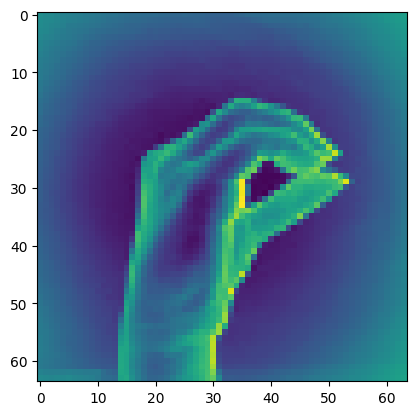

In [74]:
plt.imshow(X[1])

In [76]:
print(y[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


    Dataset é composto por X que consiste 2062 imagens 64*64 pixeis e em y que contém o digito que é (de 0 a 9)

In [3]:
print(X.shape)
print(y.shape)

(2062, 64, 64)
(2062, 10)


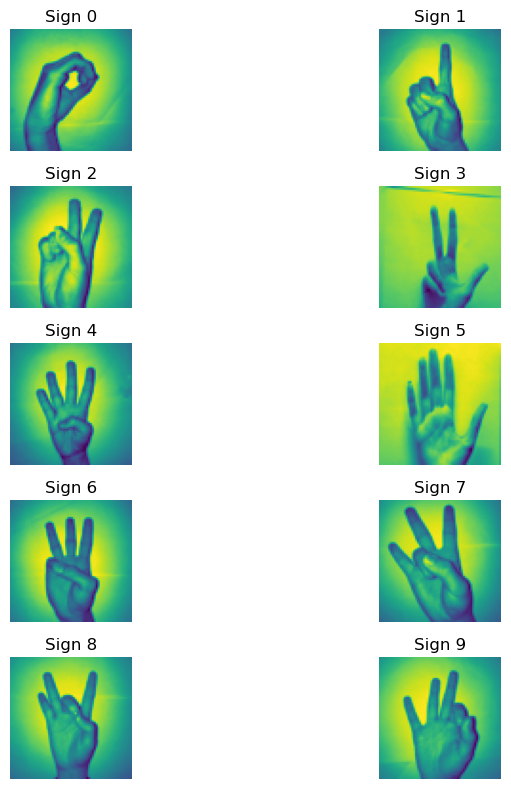

In [4]:

img_size = 64
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(10, 8))
indices = [260, 900, 1800, 1600, 1400, 2061, 700, 500, 1111, 100]

for i in range(5):
    for j in range(2):
        idx = i * 2 + j
        ax[i, j].imshow(X[indices[idx]].reshape(img_size, img_size)) 
        ax[i, j].axis('off')
        ax[i, j].set_title(f"Sign {idx}")

fig.tight_layout()
plt.show()

In [4]:
df_y = pd.DataFrame(y)
df_y.head(100)
#cada linha é uma imagem e o digito que é está representado por 1 na respetiva coluna

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Ver se os dados estão equilibrados
categories = df_y.idxmax(axis=1)

category_counts = categories.value_counts().sort_index()

print("Category Counts:")
print(category_counts)

Category Counts:
0    204
1    205
2    206
3    207
4    206
5    208
6    207
7    206
8    206
9    207
Name: count, dtype: int64


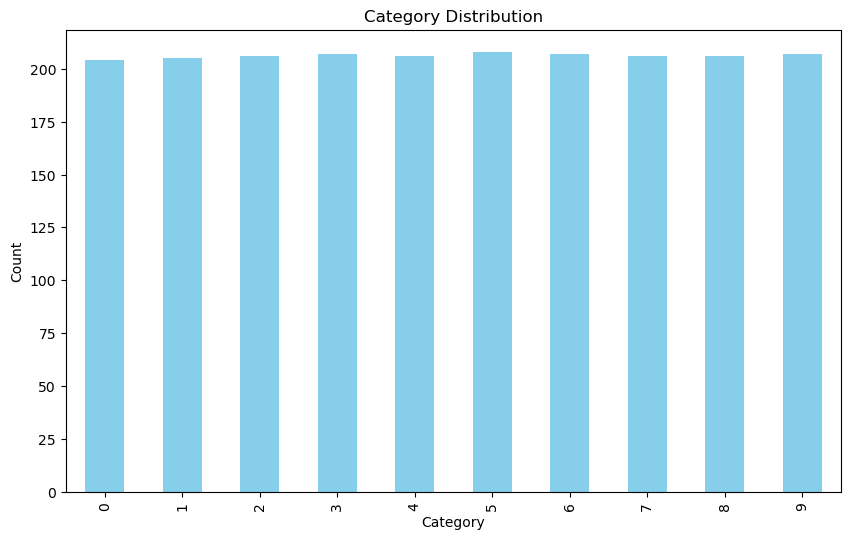

In [7]:
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [99]:
#criar uma coluna com o digito que é
df_y['target'] = np.nan
for i in range(0,10):
  df_y.loc[df_y[i] == 1.0,['target']] =   i

In [100]:
df_y

,0,1,2,3,4,5,6,7,8,9,target
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
2058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
2059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
2060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0


## Split data set into training and testing

In [7]:
X_train, X_test, y_train,y_test = train_test_split (X,y,test_size = 0.2 ,random_state = 42)
print(y_train.shape)
print(X_train.shape)

(1649, 10)
(1649, 64, 64)


In [8]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train,y_train) #reduzir as dimensoes


ValueError: Found array with dim 3. SVC expected <= 2.

In [ ]:
print(y_test[1,:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


convolutional neural networks (CNN)

In [78]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64,64,1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    
])

C:\Users\Candido Morais\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [79]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [80]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
        
y_pred = model.predict(X_test)

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.2189 - loss: 2.1461 - val_accuracy: 0.6053 - val_loss: 1.1243
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6994 - loss: 0.9433 - val_accuracy: 0.7797 - val_loss: 0.6581
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8559 - loss: 0.4754 - val_accuracy: 0.8087 - val_loss: 0.6818
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8848 - loss: 0.3805 - val_accuracy: 0.8741 - val_loss: 0.4858
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9304 - loss: 0.2057 - val_accuracy: 0.8741 - val_loss: 0.3949
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9558 - loss: 0.1432 - val_accuracy: 0.9056 - val_loss: 0.4041
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9723 - loss: 0.0884 - val_accuracy: 0.9128 - val_loss: 0.3847
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9917 - loss: 0.0415 - val_accuracy: 0.9128 - v

In [81]:
#output da probabilidade de pertencer a cada classe
print(y_pred[0])

[4.4676694e-06 8.9923144e-09 6.3043856e-04 2.5277058e-09 2.5328035e-02
 5.3510128e-08 9.7233462e-01 1.6969827e-03 5.3658123e-06 5.7176869e-08]


In [82]:
y_pred_classes = np.argmax(y_pred, axis=1)
# convert true observations to one hot vectors
y_true = np.argmax(y_test, axis=1)
# compute confusion matrix
c_mtx = confusion_matrix(y_true, y_pred_classes)

In [83]:
c_mtx

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  1,  1,  0],
       [ 1,  0, 42,  0,  0,  0,  5,  2,  0,  0],
       [ 0,  0,  1, 32,  0,  1,  0,  0,  1,  0],
       [ 3,  0,  0,  0, 24,  0,  0,  0,  4,  1],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  1],
       [ 0,  1,  1,  0,  2,  0, 32,  1,  4,  0],
       [ 0,  0,  2,  0,  0,  0,  0, 34,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  3, 41,  1],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  4, 40]], dtype=int64)

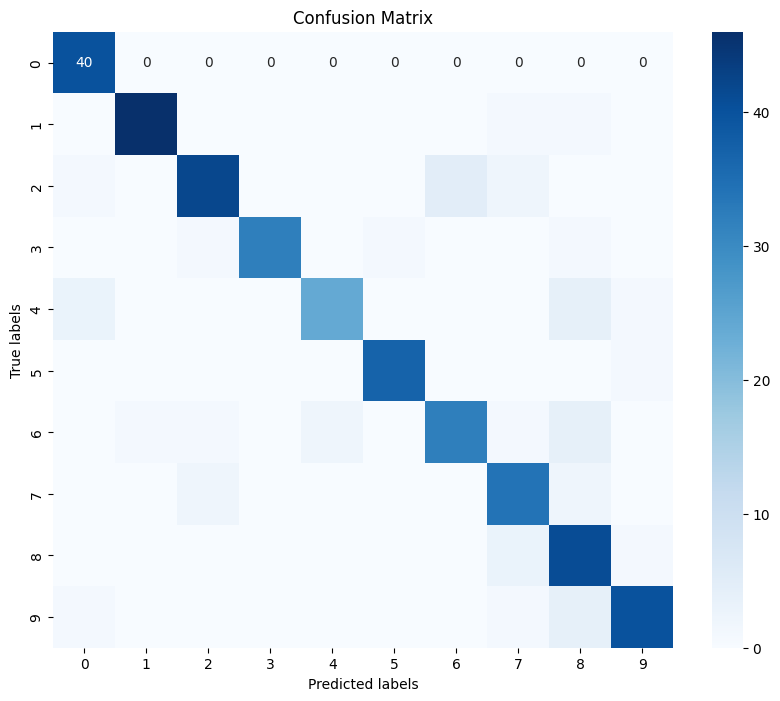

In [84]:
# plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(c_mtx, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [85]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")
train_loss, train_acc = model.evaluate(X_train, y_train)
print(f"Train Accuracy: {train_acc}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8854 - loss: 0.4323
Test Accuracy: 0.8910411596298218
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9931 - loss: 0.0253
Train Accuracy: 0.9933292865753174


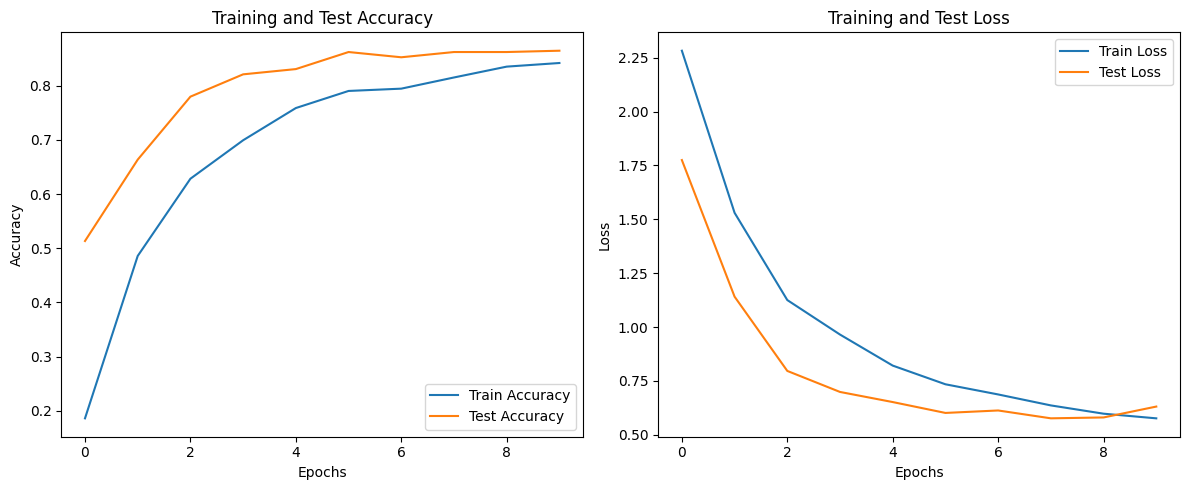

In [108]:
plt.figure(figsize=(12, 5))

# Plot da Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()

# Plot do Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

plt.tight_layout()
plt.show()

Train accuracy está muito superior o que indica overfitting

### Hiperparemtros

Diminui-se o número de filtros e adicionou-se uma camada dropout

In [100]:
model2 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64,64,1)), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),#o 3,3, indica o tamanho do filtro, maior mais geral
    #layers.MaxPooling2D((2, 2)),
    #layers.Conv2D(32, (3, 3), activation='relu'), #filtros 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5), # fazer grafico com varios valores
    layers.Dense(10, activation='softmax')
    
])
 #fazer um modelo simples para comparar
    # fazer confusion matrix do test e do train ara ver que categorias ele anda a ver

In [101]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [102]:
history = model2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
        
y_pred2 = model2.predict(X_test)

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.1227 - loss: 2.4017 - val_accuracy: 0.5133 - val_loss: 1.7748
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.4392 - loss: 1.6567 - val_accuracy: 0.6634 - val_loss: 1.1409
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.6068 - loss: 1.1271 - val_accuracy: 0.7797 - val_loss: 0.7964
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.6982 - loss: 0.9767 - val_accuracy: 0.8208 - val_loss: 0.6989
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.7469 - loss: 0.8383 - val_accuracy: 0.8305 - val_loss: 0.6520
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.7843 - loss: 0.7554 - val_accuracy: 0.8620 - val_loss: 0.6015
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.7984 - loss: 0.6711 - val_accuracy: 0.8523 - val_loss: 0.6129
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.8111 - loss: 0.6294 - val_accuracy: 0.8620

In [1]:


test_loss, test_acc = model2.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")
train_loss, train_acc = model2.evaluate(X_train, y_train)
print(f"Train Accuracy: {train_acc}")

NameError: name 'model2' is not defined

## Resultados

In [86]:
y_pred_classes = np.argmax(y_pred, axis=1)
df_ypred = pd.DataFrame(y_pred_classes)
df_ypred


,0
0,6
1,9
2,3
3,8
4,0
...,...
408,3
409,8
410,1
411,6


In [87]:
y_testC = np.argmax(y_test, axis=1)
df_y_testC = pd.DataFrame(y_testC)
df_y_testC

,0
0,6
1,9
2,3
3,9
4,0
...,...
408,3
409,8
410,1
411,6


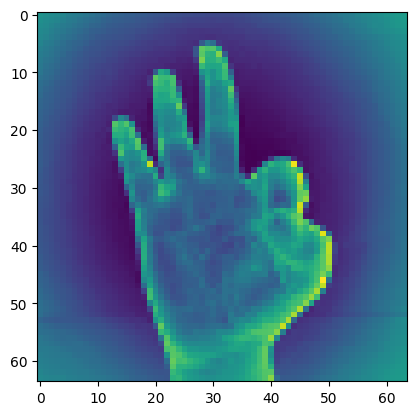

In [89]:
plt.imshow(X_test[1])


In [65]:
print(y_test[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


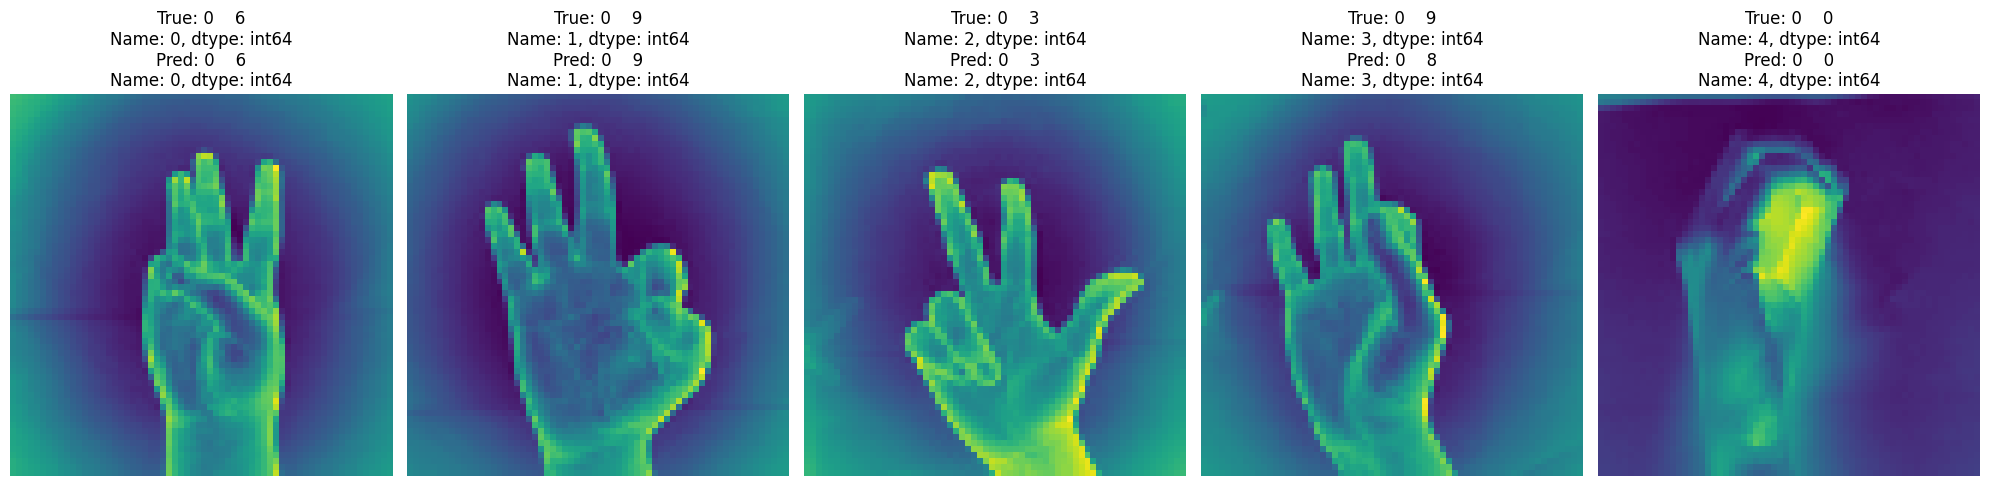

In [103]:
num_images =5 


fig, axes = plt.subplots(1, num_images, figsize=(20, 5))


for i in range(num_images):

    axes[i].imshow(X_test[i])  
    
    true_label = df_y_testC.iloc[i]
    predicted_label = df_ypred.iloc[i]
    axes[i].set_title(f"True: {true_label}\nPred: {predicted_label}", fontsize=12)
 
    axes[i].axis('off')


plt.tight_layout()
plt.show()